# data

## long dataframe

In [6]:
import pandas as pd
from gluonts.dataset.pandas import PandasDataset
from gluonts.mx import DeepAREstimator, Trainer

In [4]:
url = (
    "https://gist.githubusercontent.com/rsnirwan/a8b424085c9f44ef2598da74ce43e7a3"
    "/raw/b6fdef21fe1f654787fa0493846c546b7f9c4df2/ts_long.csv"
)
df = pd.read_csv(url, index_col = 0, parse_dates = True)
df.head()

,target,item_id
2021-01-01 00:00:00,-1.3378,A
2021-01-01 01:00:00,-1.6111,A
2021-01-01 02:00:00,-1.9259,A
2021-01-01 03:00:00,-1.9184,A
2021-01-01 04:00:00,-1.9168,A


In [27]:
ds = PandasDataset.from_long_dataframe(df, target = "target", item_id = "item_id")
dir(ds)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data_entries',
 '_pair_to_dataentry',
 '_pairs',
 'assume_sorted',
 'dataframes',
 'feat_dynamic_cat',
 'feat_dynamic_real',
 'feat_static_cat',
 'feat_static_real',
 'freq',
 'from_long_dataframe',
 'ignore_last_n_targets',
 'past_feat_dynamic_real',
 'target',
 'timestamp',
 'unchecked']

In [31]:
print(ds.dataframes)
print(ds.feat_dynamic_cat)
print(ds.feat_dynamic_real)
print(ds.feat_static_cat)
print(ds.feat_static_real)
print(ds.freq)
print(ds.from_long_dataframe)
print(ds.ignore_last_n_targets)
print(ds.past_feat_dynamic_real)
print(ds.target)
print(ds.timestamp)
print(ds.unchecked)

[]
[]
[]
[]
H
<bound method PandasDataset.from_long_dataframe of <class 'gluonts.dataset.pandas.PandasDataset'>>
0
[]
target
None
False


In [7]:
estimator = DeepAREstimator(
    freq = ds.freq,
    prediction_length = 24,
    trainer = Trainer(epochs = 1),
)
predictor = estimator.train(ds)
prediction = predictor.predict(ds)
prediction

100%|██████████████████| 50/50 [00:03<00:00, 15.07it/s, epoch=1/1, avg_epoch_loss=0.637]


<generator object GluonPredictor.predict at 0x14b011ed0>

## data with missing values

In [5]:
import numpy as np
import pandas as pd
from gluonts.dataset.pandas import PandasDataset

# data
url = (
    "https://gist.githubusercontent.com/rsnirwan/a8b424085c9f44ef2598da74ce43e7a3"
    "/raw/b6fdef21fe1f654787fa0493846c546b7f9c4df2/ts_long.csv"
)
df = pd.read_csv(url, index_col = 0, parse_dates = True)
df.head()

,target,item_id
2021-01-01 00:00:00,-1.3378,A
2021-01-01 01:00:00,-1.6111,A
2021-01-01 02:00:00,-1.9259,A
2021-01-01 03:00:00,-1.9184,A
2021-01-01 04:00:00,-1.9168,A


In [7]:
# add missing value
remove_ind = np.random.choice(np.arange(df.shape[0]), size = 100, replace = False)
mask = [False if i in remove_ind else True for i in range(df.shape[0])]
df_missing_val = df.loc[mask, :]

In [8]:
max_end = max(df.groupby("item_id").apply(lambda _df: _df.index[-1]))
dfs_dict = {}
for item_id, gdf in df.groupby("item_id"):
    new_index = pd.date_range(gdf.index[0], end = max_end, freq = "1D")
    dfs_dict[item_id] = gdf.reindex(new_index).drop("item_id", axis = 1)

In [10]:
ds = PandasDataset(dfs_dict, target = "target")
ds

PandasDataset(target='target', feat_dynamic_real=None, past_feat_dynamic_real=None, timestamp=None, freq='D', future_length=0, unchecked=False, assume_sorted=False, dtype=<class 'numpy.float32'>, _data_entries=StarMap(fn=<bound method PandasDataset._pair_to_dataentry of ...>, iterable=dict_items([('A',             target
2021-01-01 -1.3378
2021-01-02 -0.5301
2021-01-03 -1.2102
2021-01-04 -0.5331
2021-01-05 -1.2834
2021-01-06 -0.4846
2021-01-07 -1.4270
2021-01-08 -0.5511
2021-01-09 -1.3495
2021-01-10 -0.6185), ('B',             target
2021-01-01  0.1268
2021-01-02  0.3916
2021-01-03  0.2064
2021-01-04  0.3382
2021-01-05  0.1351
2021-01-06  0.2952
2021-01-07  0.1891
2021-01-08  0.1884
2021-01-09  0.2019
2021-01-10  0.2507), ('C',             target
2021-01-01 -0.3645
2021-01-02 -2.4307
2021-01-03 -0.2713
2021-01-04 -2.0956
2021-01-05 -0.2446
2021-01-06 -2.3860
2021-01-07 -0.3777
2021-01-08 -2.2534
2021-01-09 -0.3707
2021-01-10 -2.2530), ('D',             target
2021-01-01 -1.0864
2021-01

## wide dataframe

In [13]:
import pandas as pd
from gluonts.dataset.pandas import PandasDataset

url_wide = (
    "https://gist.githubusercontent.com/rsnirwan/c8c8654a98350fadd229b00167174ec4"
    "/raw/a42101c7786d4bc7695228a0f2c8cea41340e18f/ts_wide.csv"
)
df_wide = pd.read_csv(url_wide, index_col = 0, parse_dates = True)
df_wide.head()

,A,B,C,D,E,F,G,H,I,J
2021-01-01 00:00:00,-1.3378,0.1268,-0.3645,-1.0864,-2.3803,-0.2447,2.2647,-0.7917,0.7071,1.3763
2021-01-01 01:00:00,-1.6111,0.0926,-0.1364,-1.1613,-2.1421,-0.3477,2.4262,-0.9609,0.6413,1.2750
2021-01-01 02:00:00,-1.9259,-0.1420,0.1063,-1.0405,-2.1426,-0.3271,2.4434,-0.9034,0.4323,0.6767
2021-01-01 03:00:00,-1.9184,-0.4930,0.6269,-0.8531,-1.7060,-0.3088,2.4307,-0.9602,0.3193,0.5150
2021-01-01 04:00:00,-1.9168,-0.5057,0.9419,-0.7666,-1.4287,-0.4284,2.3258,-1.2504,0.3660,0.1708


In [22]:
ds = PandasDataset(dict(df_wide))
ds

PandasDataset(dataframes={'A': 2021-01-01 00:00:00   -1.3378
2021-01-01 01:00:00   -1.6111
2021-01-01 02:00:00   -1.9259
2021-01-01 03:00:00   -1.9184
2021-01-01 04:00:00   -1.9168
                        ...  
2021-01-10 19:00:00    0.7328
2021-01-10 20:00:00    0.4957
2021-01-10 21:00:00   -0.1209
2021-01-10 22:00:00   -0.5072
2021-01-10 23:00:00   -0.6661
Name: A, Length: 240, dtype: float64, 'B': 2021-01-01 00:00:00    0.1268
2021-01-01 01:00:00    0.0926
2021-01-01 02:00:00   -0.1420
2021-01-01 03:00:00   -0.4930
2021-01-01 04:00:00   -0.5057
                        ...  
2021-01-10 19:00:00    0.6937
2021-01-10 20:00:00    0.7043
2021-01-10 21:00:00    0.5297
2021-01-10 22:00:00    0.5816
2021-01-10 23:00:00    0.3736
Name: B, Length: 240, dtype: float64, 'C': 2021-01-01 00:00:00   -0.3645
2021-01-01 01:00:00   -0.1364
2021-01-01 02:00:00    0.1063
2021-01-01 03:00:00    0.6269
2021-01-01 04:00:00    0.9419
                        ...  
2021-01-10 19:00:00   -0.3679
2021-01-10 20

# training and test data

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (100, 6)

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.dataset.util import to_pandas

%matplotlib inline

## dataset

In [59]:
# dataset
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = (
    pd.read_csv(url, header = 0, index_col = "timestamp", parse_dates = True)
    .resample("1H")
    .sum()
)
df.head()

,value
timestamp,
2015-02-26 21:00:00,219
2015-02-26 22:00:00,931
2015-02-26 23:00:00,568
2015-02-27 00:00:00,516
2015-02-27 01:00:00,574


In [65]:
dataset = PandasDataset(df, target = "value")
dataset

PandasDataset(dataframes=                     value
timestamp                 
2015-02-26 21:00:00    219
2015-02-26 22:00:00    931
2015-02-26 23:00:00    568
2015-02-27 00:00:00    516
2015-02-27 01:00:00    574
...                    ...
2015-04-22 16:00:00    787
2015-04-22 17:00:00    785
2015-04-22 18:00:00    945
2015-04-22 19:00:00    740
2015-04-22 20:00:00    623

[1320 rows x 1 columns], target='value', timestamp=None, freq='H', feat_dynamic_real=[], feat_dynamic_cat=[], feat_static_real=[], feat_static_cat=[], past_feat_dynamic_real=[], ignore_last_n_targets=0, unchecked=False, assume_sorted=False, _pairs=[(None,                      value
timestamp                 
2015-02-26 21:00:00    219
2015-02-26 22:00:00    931
2015-02-26 23:00:00    568
2015-02-27 00:00:00    516
2015-02-27 01:00:00    574
...                    ...
2015-04-22 16:00:00    787
2015-04-22 17:00:00    785
2015-04-22 18:00:00    945
2015-04-22 19:00:00    740
2015-04-22 20:00:00    623

[1320 rows x 1 

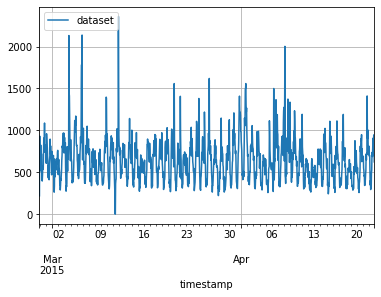

In [66]:
df.plot()
plt.legend(["dataset"], loc = "upper left")
plt.show()

## train/test splits

In [67]:
def highlight_entry(entry, color):
    start = entry["start"]
    end = entry["start"] + len(entry["target"])
    plt.axvspan(start, end, facecolor=color, alpha=0.2)


def plot_dataset_splitting(original_dataset, training_dataset, test_pairs):
    for original_entry, train_entry in zip(original_dataset, training_dataset):
        to_pandas(original_entry).plot()
        highlight_entry(train_entry, "red")
        plt.legend(["sub dataset", "training dataset"], loc="upper left")
        plt.show()

    for original_entry in original_dataset:
        for test_input, test_label in test_pairs:
            to_pandas(original_entry).plot()
            highlight_entry(test_input, "green")
            highlight_entry(test_label, "blue")
            plt.legend(["sub dataset", "test input", "test label"], loc="upper left")
            plt.show()

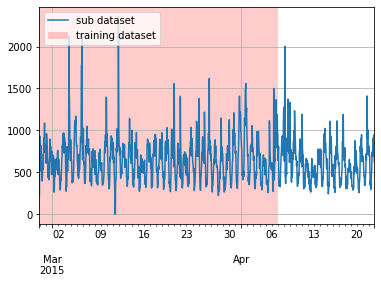

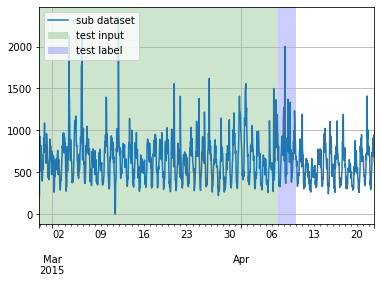

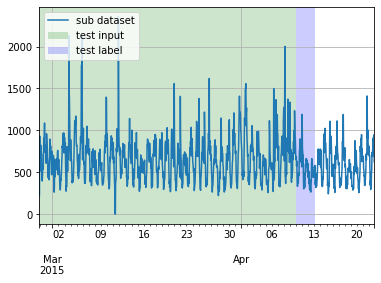

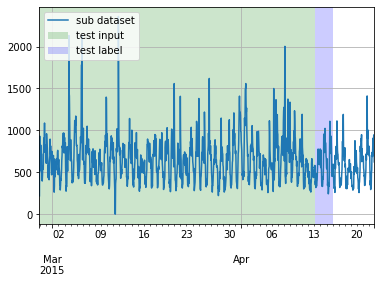

In [68]:
prediction_length = 3 * 24

training_dataset, test_template = split(dataset, date = pd.Period("2015-04-07 00:00:00", freq = "1H"))
test_pair = test_template.generate_instances(prediction_length = prediction_length, windows = 3)

plot_dataset_splitting(dataset, training_dataset, test_pair)

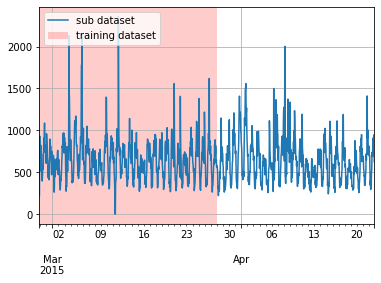

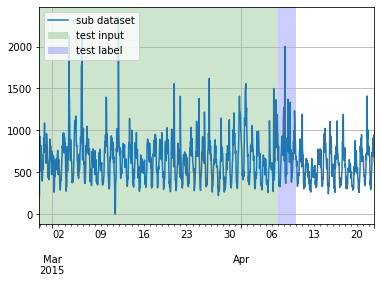

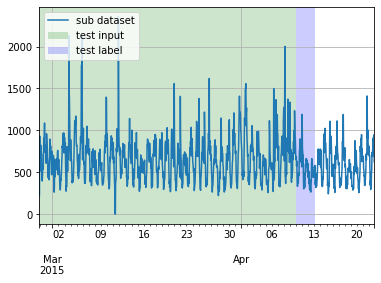

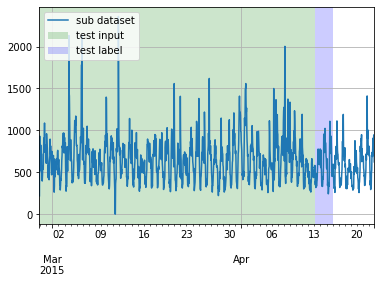

In [70]:
training_dataset, _ = split(dataset, date = pd.Period("2015-03-28 00:00:00", freq = "1H"))
_, test_template = split(dataset, date = pd.Period("2015-04-07 00:00:00", freq = "1H"))
test_pairs = test_template.generate_instances(prediction_length = prediction_length, windows = 3)

plot_dataset_splitting(dataset, training_dataset, test_pairs)

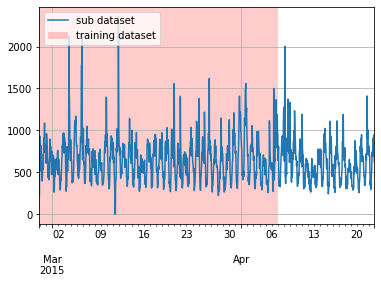

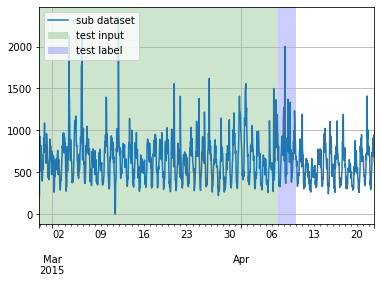

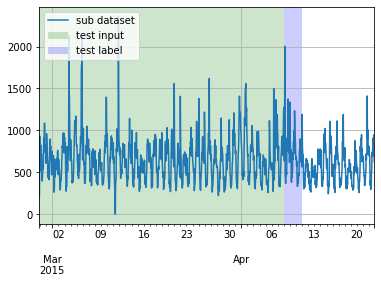

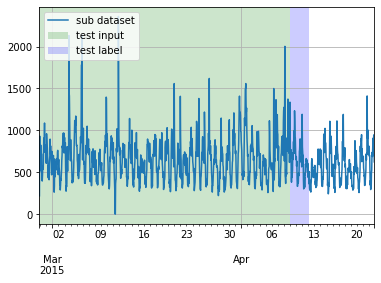

In [71]:
training_dataset, test_template = split(dataset, date = pd.Period("2015-04-07 00:00:00", freq = "1H"))
test_pairs = test_template.generate_instances(
    prediction_length = prediction_length,
    windows = 3,
    distance = 24,
)

plot_dataset_splitting(dataset, training_dataset, test_pairs)